In [2]:
library("XML")
u<-"http://hydro.chmi.cz/hpps/hpps_prfdata.php?seq=2497648"
doc = htmlParse(u)
tableNodes = getNodeSet(doc, "//table")
soucasnost = readHTMLTable(tableNodes[[6]],colClasses = c("character","integer",rep("double", 2)))
soucasnost<-as.data.frame(soucasnost) 
names(soucasnost)<-c("cas","vyska","prutok","teplota")
soucasnost$cas <- strptime(soucasnost$cas, "%d.%m.%Y %H:%M")
temp<-soucasnost
soucasnost<-soucasnost[1:29,]

a<-"Jizera v Předměřicích"
a<-cbind(a,paste0("\nAktuální teplota: ",soucasnost$teplota[1]," °C"))
a<-cbind(a,paste0("Čas měření: ",format(soucasnost$cas[1],"%d.%m.%Y %H:%M")))
a<-cbind(a,"00:00 > 06:00 > 12:00 > 18:00")
a<-cbind(a,paste(ifelse(any(soucasnost$cas==strptime("00:00","%H:%M")),soucasnost$teplota[soucasnost$cas==strptime("00:00","%H:%M")],"NA")," >",
ifelse(any(soucasnost$cas==strptime("06:00","%H:%M")),soucasnost$teplota[soucasnost$cas==strptime("06:00","%H:%M")],"NA")," >",
ifelse(any(soucasnost$cas==strptime("12:00","%H:%M")),soucasnost$teplota[soucasnost$cas==strptime("12:00","%H:%M")],"NA")," >",
ifelse(any(soucasnost$cas==strptime("18:00","%H:%M")),soucasnost$teplota[soucasnost$cas==strptime("18:00","%H:%M")],"NA")))
a<-cbind(a,paste("Max:", max(soucasnost$teplota), "@", format(soucasnost$cas[which(soucasnost$teplota==max(soucasnost$teplota))][1],"%H:%M %d-%m")))
a<-cbind(a,paste("Min:", min(soucasnost$teplota), "@", format(soucasnost$cas[which(soucasnost$teplota==min(soucasnost$teplota))][1],"%H:%M %d-%m")))

txt<-paste(a,collapse="\n")
#cat(txt)

b<-""
b<-cbind(b,paste0("\nAktuální výška: ",soucasnost$vyska[1]," cm"))
b<-cbind(b,paste0("Čas měření: ",format(soucasnost$cas[1],"%d.%m.%Y %H:%M")))
b<-cbind(b,"00:00 > 06:00 > 12:00 > 18:00")
b<-cbind(b,paste(ifelse(any(soucasnost$cas==strptime("00:00","%H:%M")),soucasnost$vyska[soucasnost$cas==strptime("00:00","%H:%M")],"NA")," >",
ifelse(any(soucasnost$cas==strptime("06:00","%H:%M")),soucasnost$vyska[soucasnost$cas==strptime("06:00","%H:%M")],"NA")," >",
ifelse(any(soucasnost$cas==strptime("12:00","%H:%M")),soucasnost$vyska[soucasnost$cas==strptime("12:00","%H:%M")],"NA")," >",
ifelse(any(soucasnost$cas==strptime("18:00","%H:%M")),soucasnost$vyska[soucasnost$cas==strptime("18:00","%H:%M")],"NA")))
b<-cbind(b,paste("Max:", max(soucasnost$vyska), "@", format(soucasnost$cas[which(soucasnost$vyska==max(soucasnost$vyska))][1],"%H:%M %d-%m")))
b<-cbind(b,paste("Min:", min(soucasnost$vyska), "@", format(soucasnost$cas[which(soucasnost$vyska==min(soucasnost$vyska))][1],"%H:%M %d-%m")))

txt2<-paste(b,collapse="\n")

cat(paste(txt,txt2))

Warning message:
"package 'XML' was built under R version 3.6.2"


Jizera v Předměřicích

Aktuální teplota: 4.7 °C
Čas měření: 24.02.2020 20:10
00:00 > 06:00 > 12:00 > 18:00
5.1  > 5  > 5.4  > 5.2
Max: 5.6 @ 14:00 24-02
Min: 4.7 @ 20:10 24-02 

Aktuální výška: 349 cm
Čas měření: 24.02.2020 20:10
00:00 > 06:00 > 12:00 > 18:00
180  > 251  > 335  > 355
Max: 355 @ 18:00 24-02
Min: 180 @ 00:00 24-02

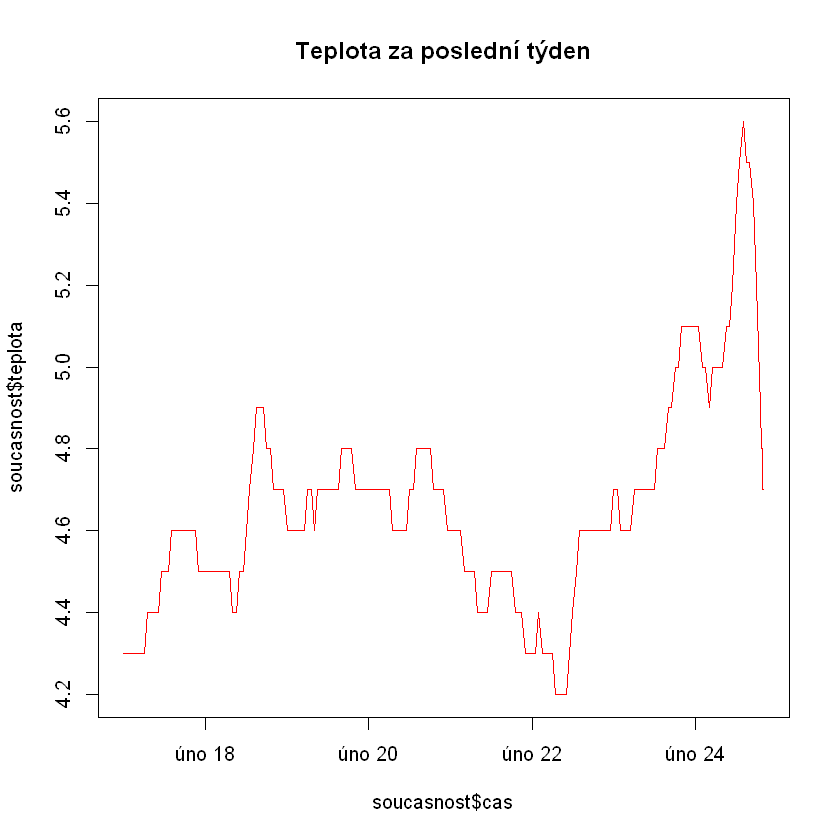

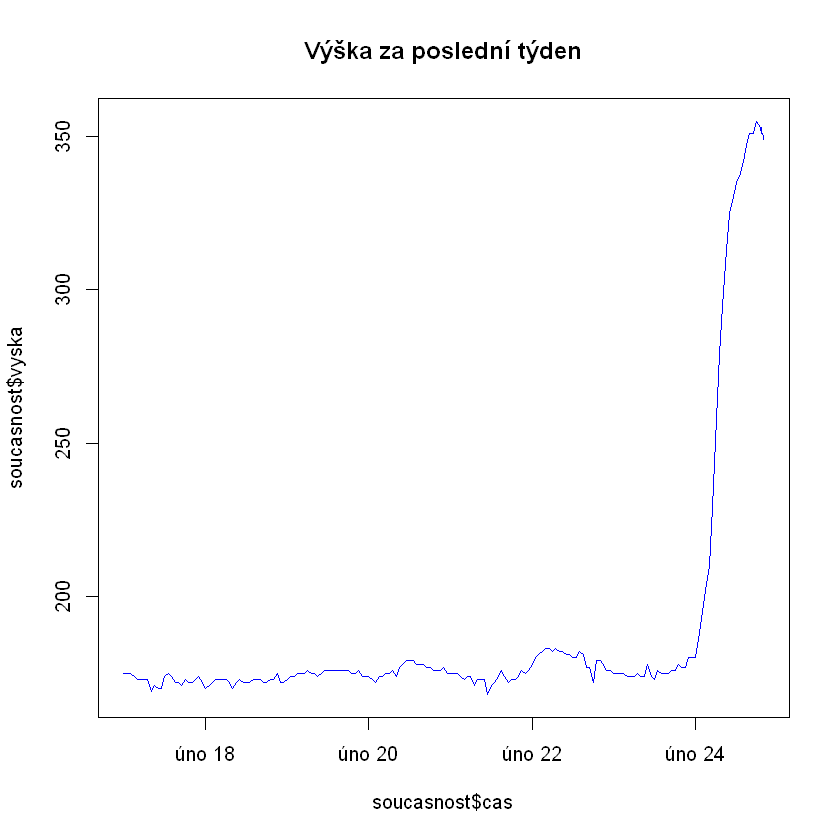

In [3]:
soucasnost<-temp
plot(soucasnost$cas, soucasnost$teplota, type="l", main="Teplota za poslední týden", col="red")
plot(soucasnost$cas, soucasnost$vyska, type="l", main="Výška za poslední týden",col="blue")